In [2]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
reg = pd.read_excel('rushi proj.xlsx')


In [5]:
# Create training and test dataset
y = reg['MonthlyIncome']
X = reg.iloc[:,0:1]
X1 = reg.iloc[:,3]
X2 = reg.iloc[:,5:6]
X3 = reg.iloc[:,8:10]
X4 = reg.iloc[:,12:14]
X5 = reg.iloc[:,16]
X6 = reg.iloc[:,18:20]
X7=reg.iloc[:,23:35]
Gender = pd.get_dummies(reg['Gender'])
MaritalStatus = pd.get_dummies(reg['MaritalStatus'])

EducationField = pd.get_dummies(reg['EducationField'])
JobRole = pd.get_dummies(reg['JobRole'])
BusinessTravel = pd.get_dummies(reg['BusinessTravel'])
Department = pd.get_dummies(reg['Department'])
#MonthlyIncome = pd.get_dummies(reg['MonthlyIncome'])


OverTime = pd.get_dummies(reg['OverTime'])

In [6]:
X = pd.concat([X,X1,X2,X3,X4,X5,X6,X7,Gender,MaritalStatus,OverTime,EducationField,JobRole,BusinessTravel,Department],sort = False, axis = 1)
print(X.shape)
X.head()

(1470, 50)


,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,Research Director,Research Scientist,Sales Executive,Sales Representative,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
0,1,1102,1,1,1,94,3,4,5993,19479,...,0,0,1,0,0,0,1,0,0,1
1,0,279,8,1,2,61,2,2,5130,24907,...,0,1,0,0,0,1,0,0,1,0
2,1,1373,2,1,4,92,2,3,2090,2396,...,0,0,0,0,0,0,1,0,1,0
3,0,1392,3,1,5,56,3,3,2909,23159,...,0,1,0,0,0,1,0,0,1,0
4,0,591,2,1,7,40,3,2,3468,16632,...,0,0,0,0,0,0,1,0,1,0


In [7]:
X.dtypes

Attrition                    int64
DailyRate                    int64
DistanceFromHome             int64
EmployeeCount                int64
EmployeeNumber               int64
HourlyRate                   int64
JobInvolvement               int64
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Female                       uint8
Male                         uint8
Divorced                     uint8
Married                      uint8
Single                       uint8
No                           uint8
Yes                 

In [10]:

# Splitting X and y into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.60,
                                            test_size = 0.40, random_state = 0)
# random_state parameter provides seed value to internal random
# number generator function
# default 75% - 25% partitioning of data into Training and Test data set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(882, 50)
(588, 50)
(882,)
(588,)


In [11]:
# create classifier object
knn = KNeighborsClassifier(n_neighbors = 5)


In [12]:
# Train the classifier (fit the estimator) using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
# Estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.0017006802721088435

In [14]:
# Use the trained knn classifier model to classify

# multiple K values in Knn
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

print('(k,accuracy)=',[(i+1,np.round(scores[i],4)) for i in range(len(scores))])


(k,accuracy)= [(1, 0.0017), (2, 0.0017), (3, 0.0034), (4, 0.0034), (5, 0.0017), (6, 0.0017), (7, 0.0017), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0)]


<IPython.core.display.Javascript object>


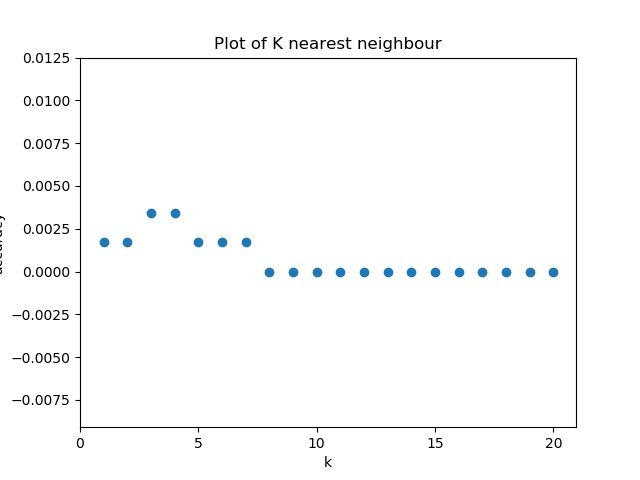

In [15]:
# Plot k vs accuracy
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Plot of K nearest neighbour')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [16]:
# K fold cross validation
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors = 5)
# default 3 fold cv
cv_scores = cross_val_score(clf, X, y)

print(' Cross-validation scores (3 fold):', cv_scores)
print(' Mean Cross-validation scores (3 fold): {:.3f}'
        .format(np.mean(cv_scores)))


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


 Cross-validation scores (3 fold): [0.00222222 0.00917431 0.        ]
 Mean Cross-validation scores (3 fold): 0.004
